# LOGISTIC REGRESSION

In [1]:
# importing liberaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Logistic%20regression/Titanic_test.csv', index_col=0)
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Logistic%20regression/Titanic_train.csv', index_col=0)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# statistical analysis

In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### age column is having missing values


In [8]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing values

#### Age and Fare is having missing values
#### Fare column is having a missing values
#### Cabin column is aloso having missing values

In [9]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
test_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# pattern Analysis

#### Female survival

In [13]:
women=train_data.loc[train_data['Sex'] == 'female']['Survived']
women_survived = sum(women)
women_survived

233

In [14]:
total_women = len(women)
total_women

314

In [15]:
women_survival_rate = women_survived/total_women
print(f'percentage of women who survived {women_survival_rate*100} %')

percentage of women who survived 74.20382165605095 %


#### Male Survival

In [16]:
man = train_data.loc[train_data['Sex'] == 'male']['Survived']
male_survived = sum(man)
male_survived

109

In [17]:
total_male = len(man)
total_male

577

In [18]:
man_survival_rate  = male_survived/total_male
man_survival_rate

0.18890814558058924

print(f'percentage of male who survived {man_survival_rate*100} %')

print(f'percentage of male who survived {man_survival_rate*100} %')

### Analysis: Only around 19 % of the male survived. But 74 % of Female Survied. REASON may be: man gave priority to women and childern to keep them safe

# HANDILING MISSING VALUES

### FOR TRAINING DATA

In [19]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
# age column is having missing values so I need to impute missing values in the Age column by using median of that column

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
si = SimpleImputer(strategy="median")

In [23]:
train_data.loc[:,["Age"]] = si.fit_transform(train_data.loc[:,["Age"]])

In [24]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
# there is no missing values in the Age column

### FOR TESTING DATA

In [27]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [28]:
# there is missing values in the Age column so I need to impute those with median of the Age column

In [29]:
test_data.loc[:,['Age']] = si.fit_transform(test_data.loc[:,['Age']])

In [30]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### all the missing values imputed

# Visualization

In [78]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [91]:
sns.set_theme(style='darkgrid', palette='viridis')

<Axes: xlabel='count', ylabel='Sex'>

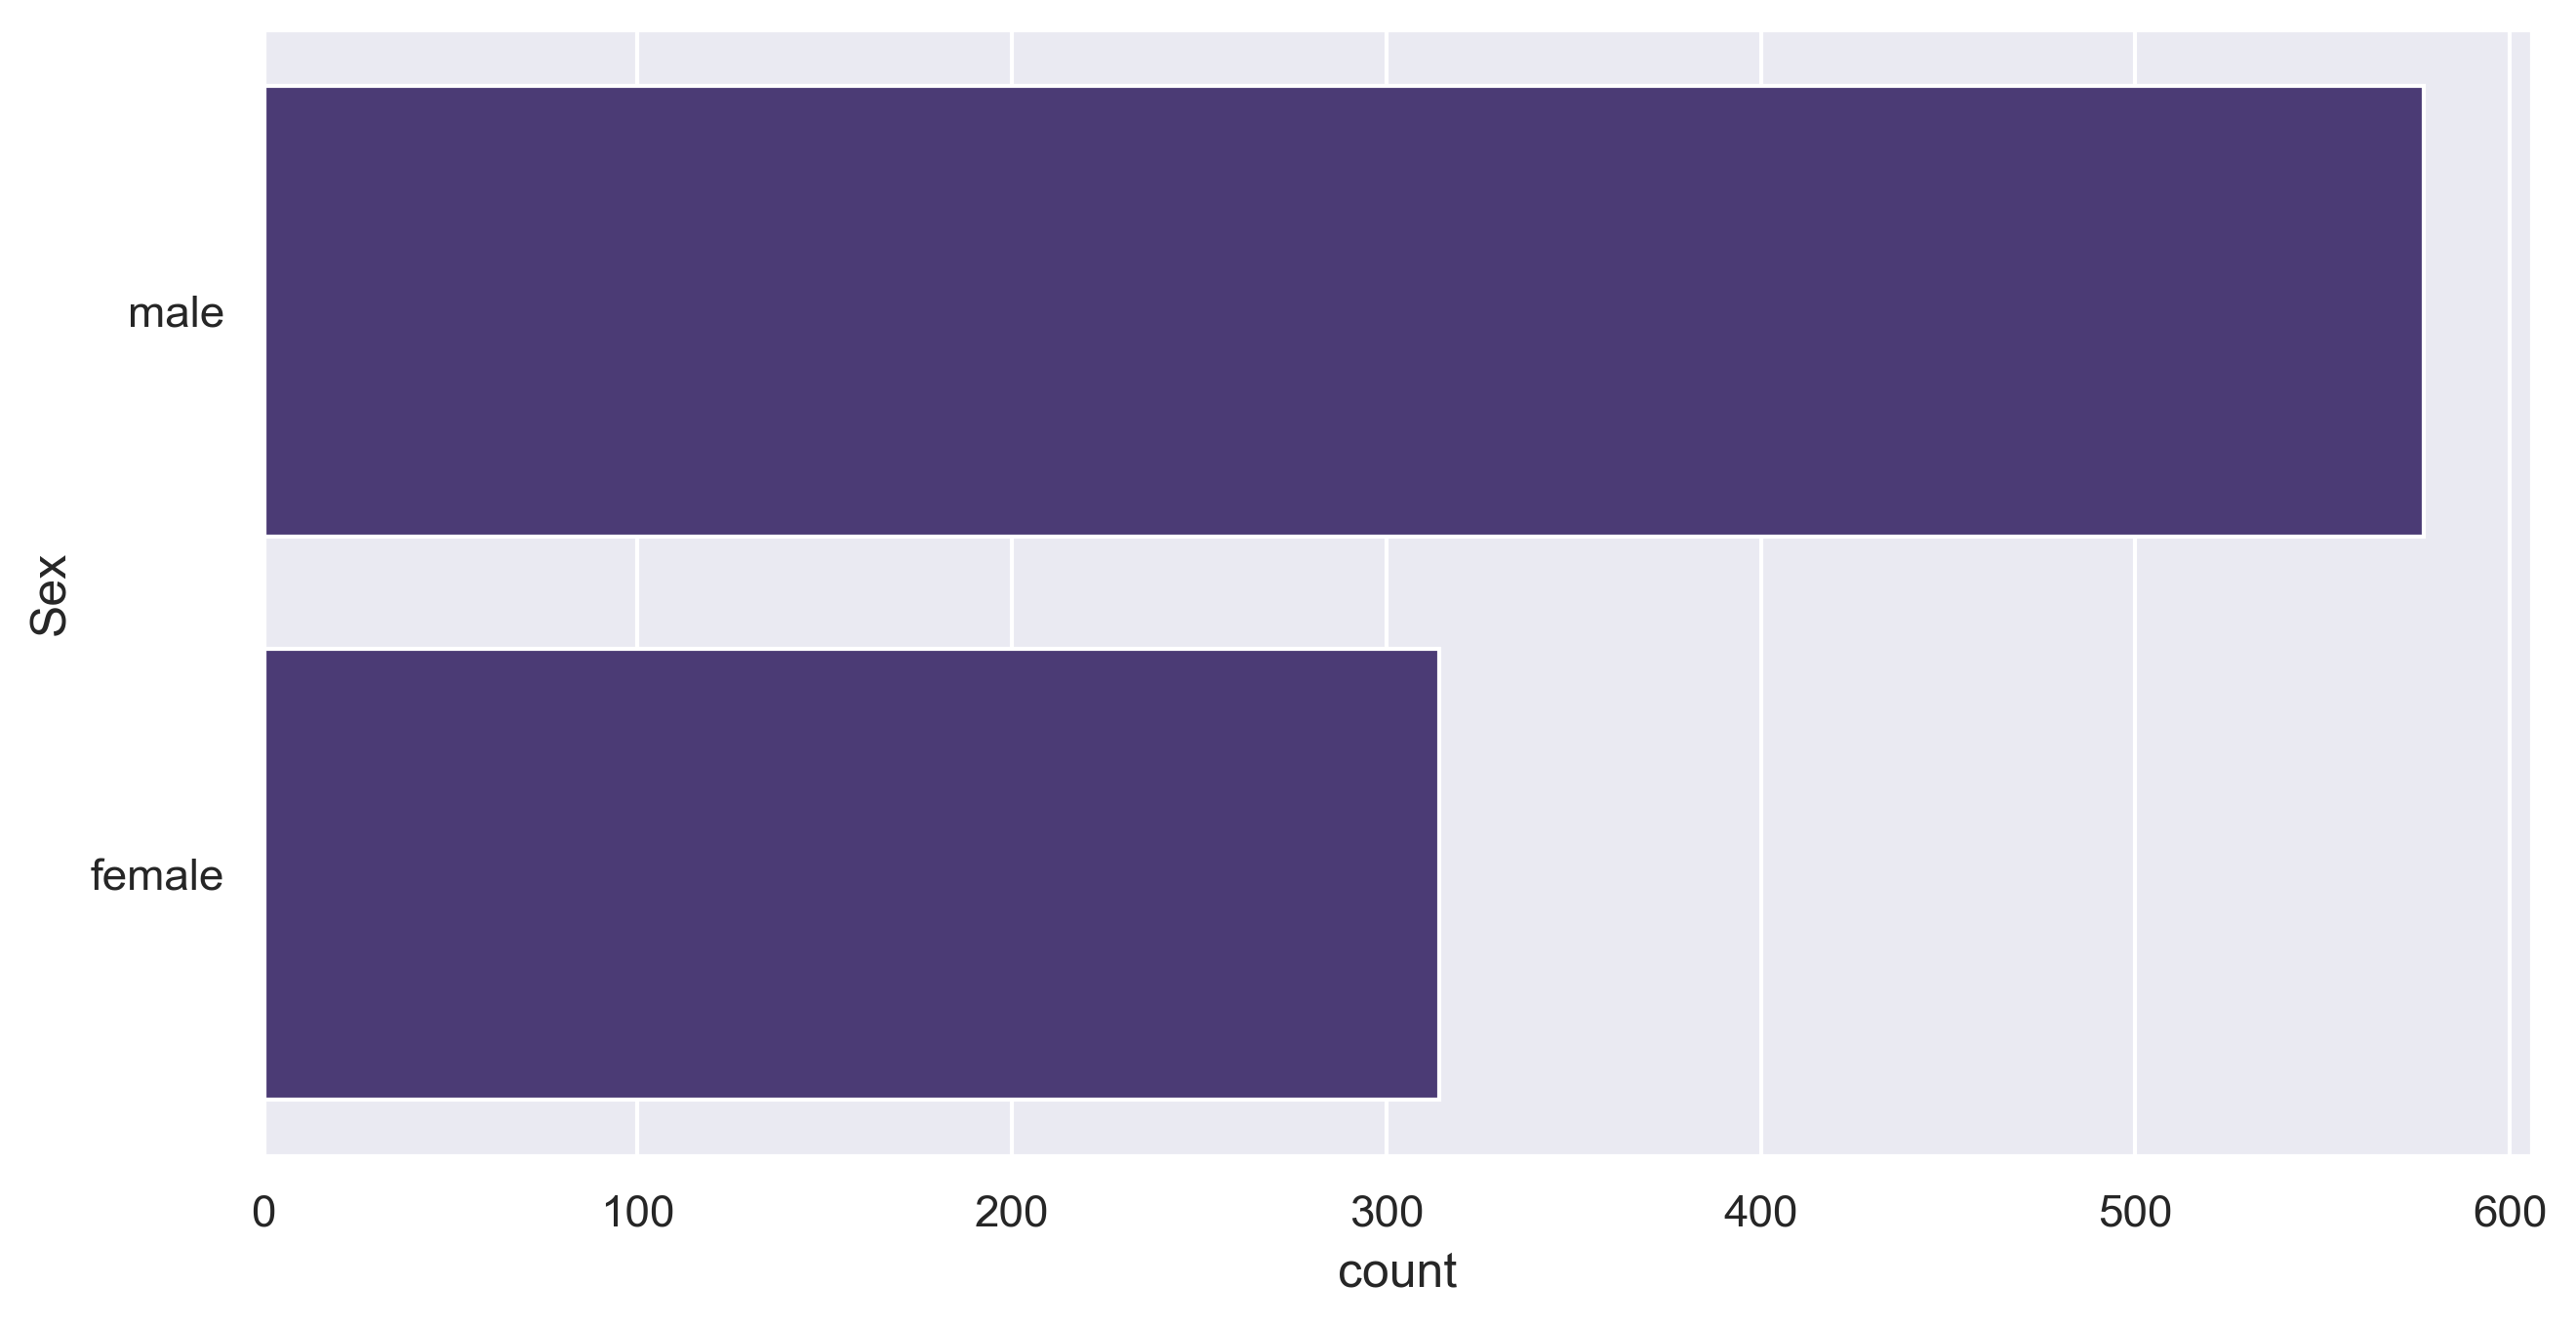

In [92]:
sns.countplot(train_data['Sex'])

In [93]:
test_data['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [ ]:
# Pclass data visualization

<Axes: xlabel='Pclass', ylabel='Count'>

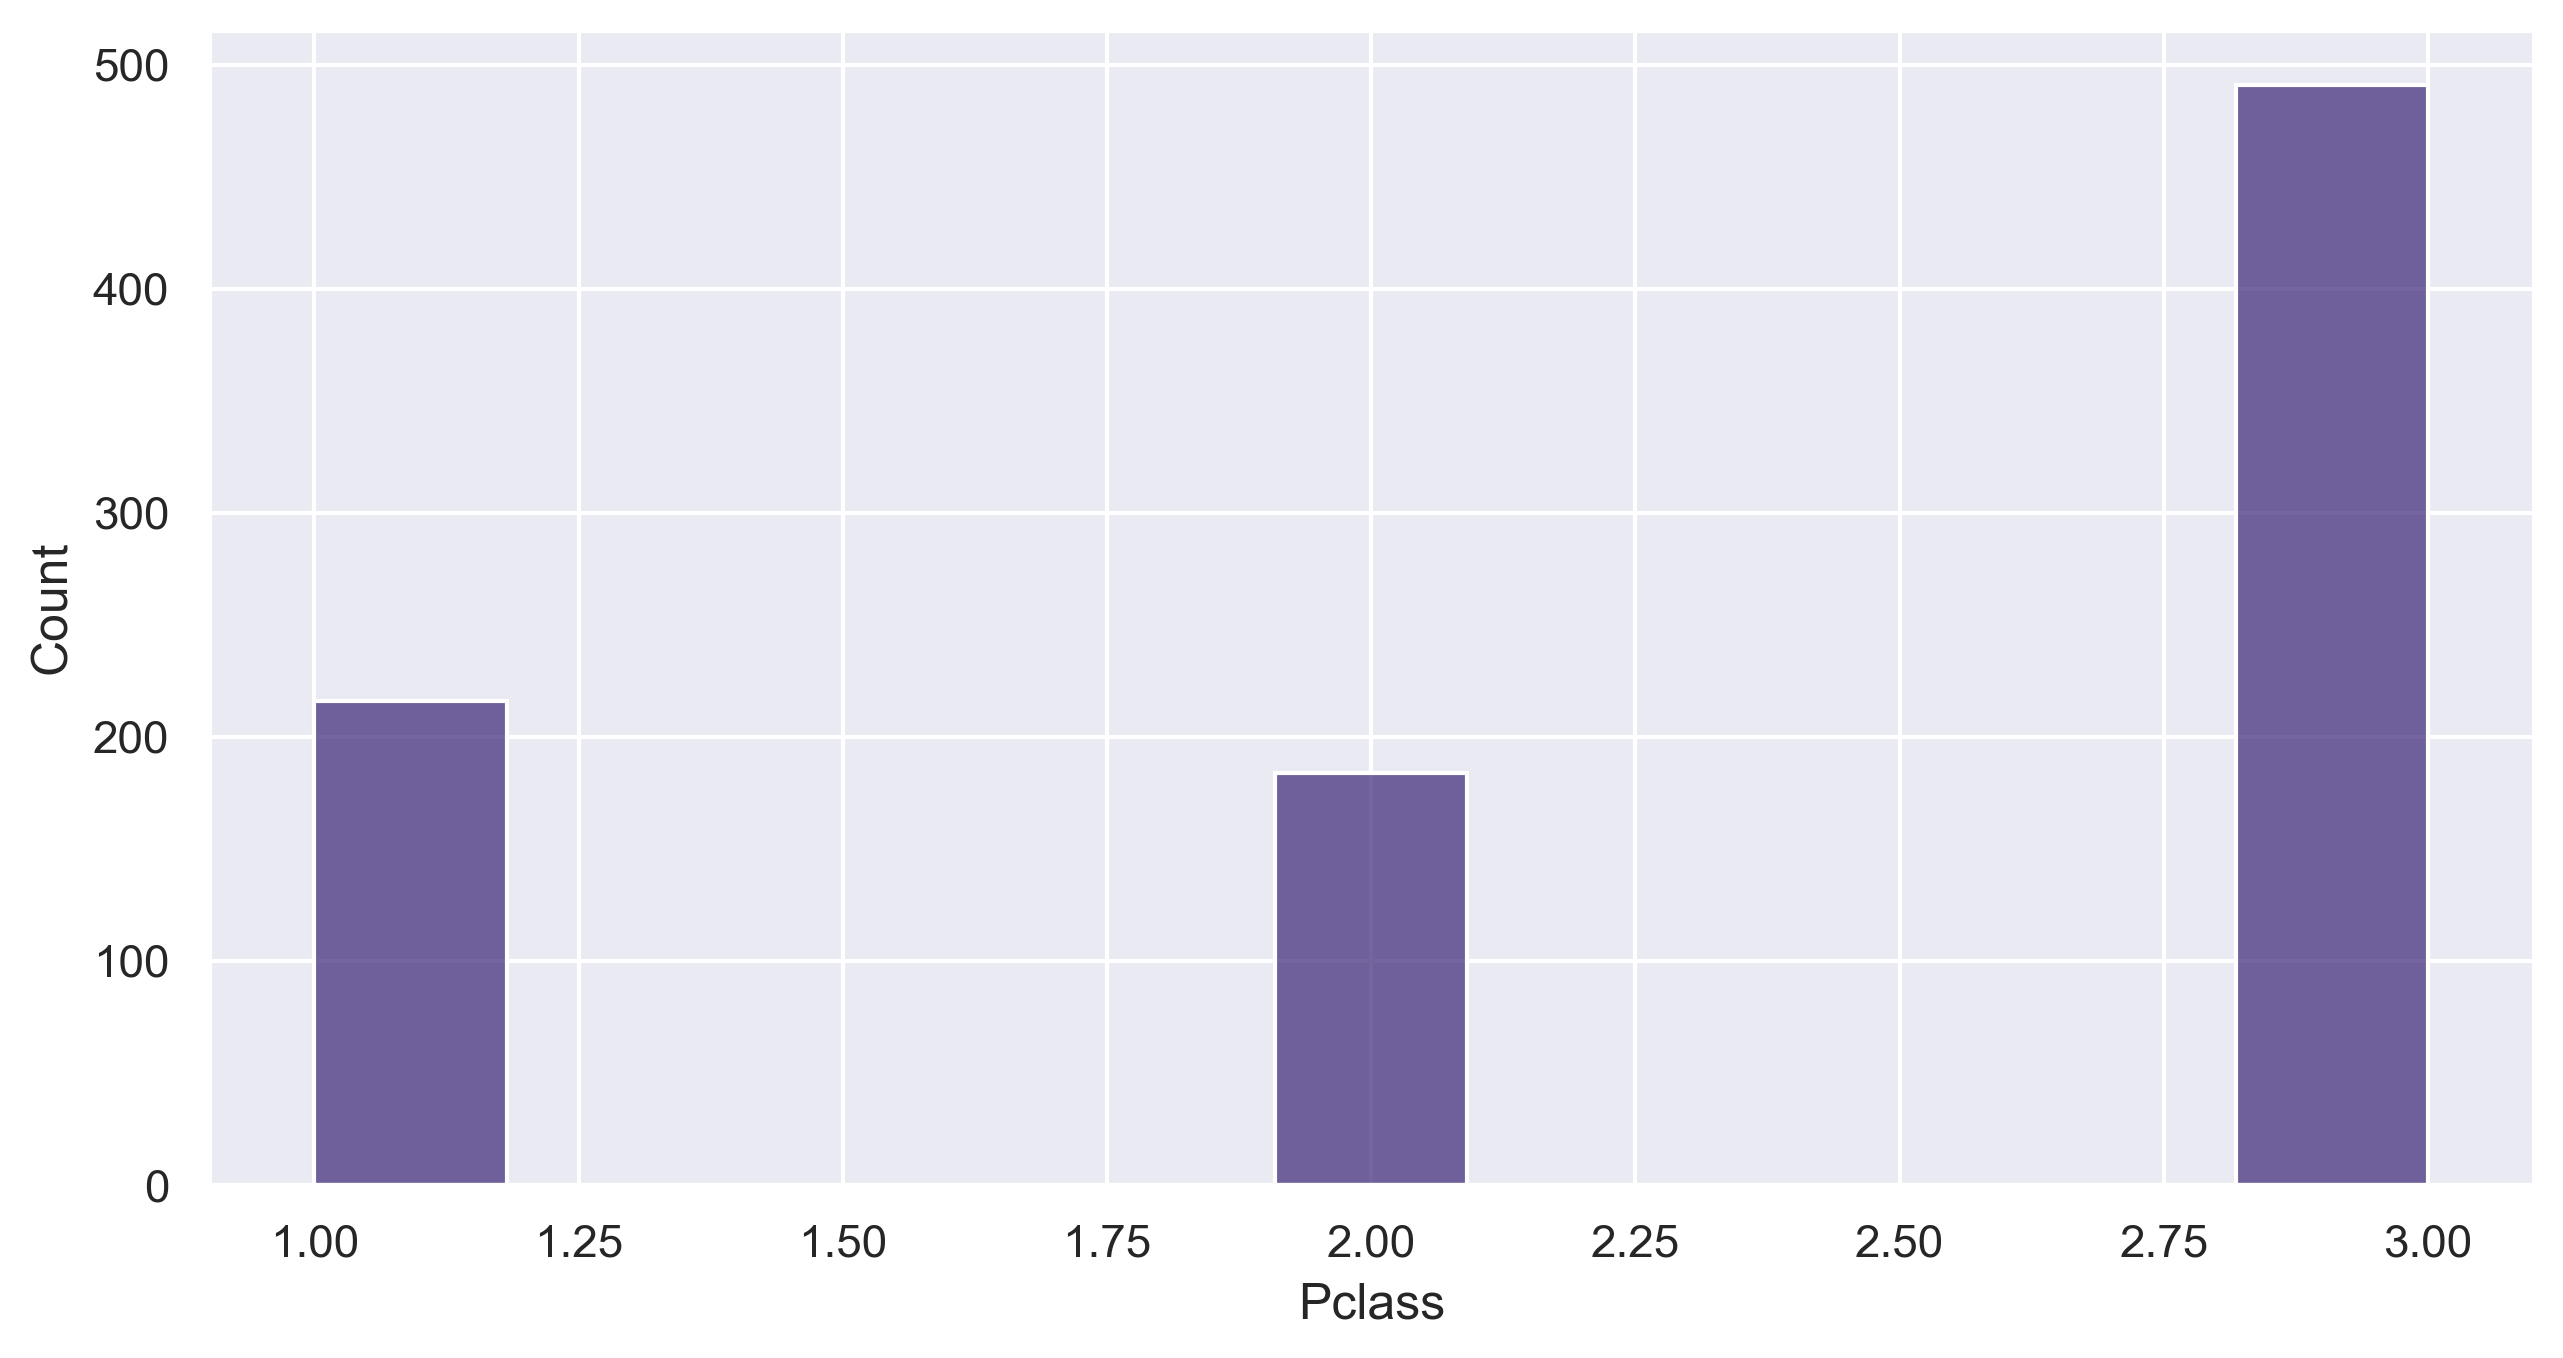

In [94]:
sns.histplot(train_data['Pclass'])

<Axes: xlabel='Age', ylabel='Count'>

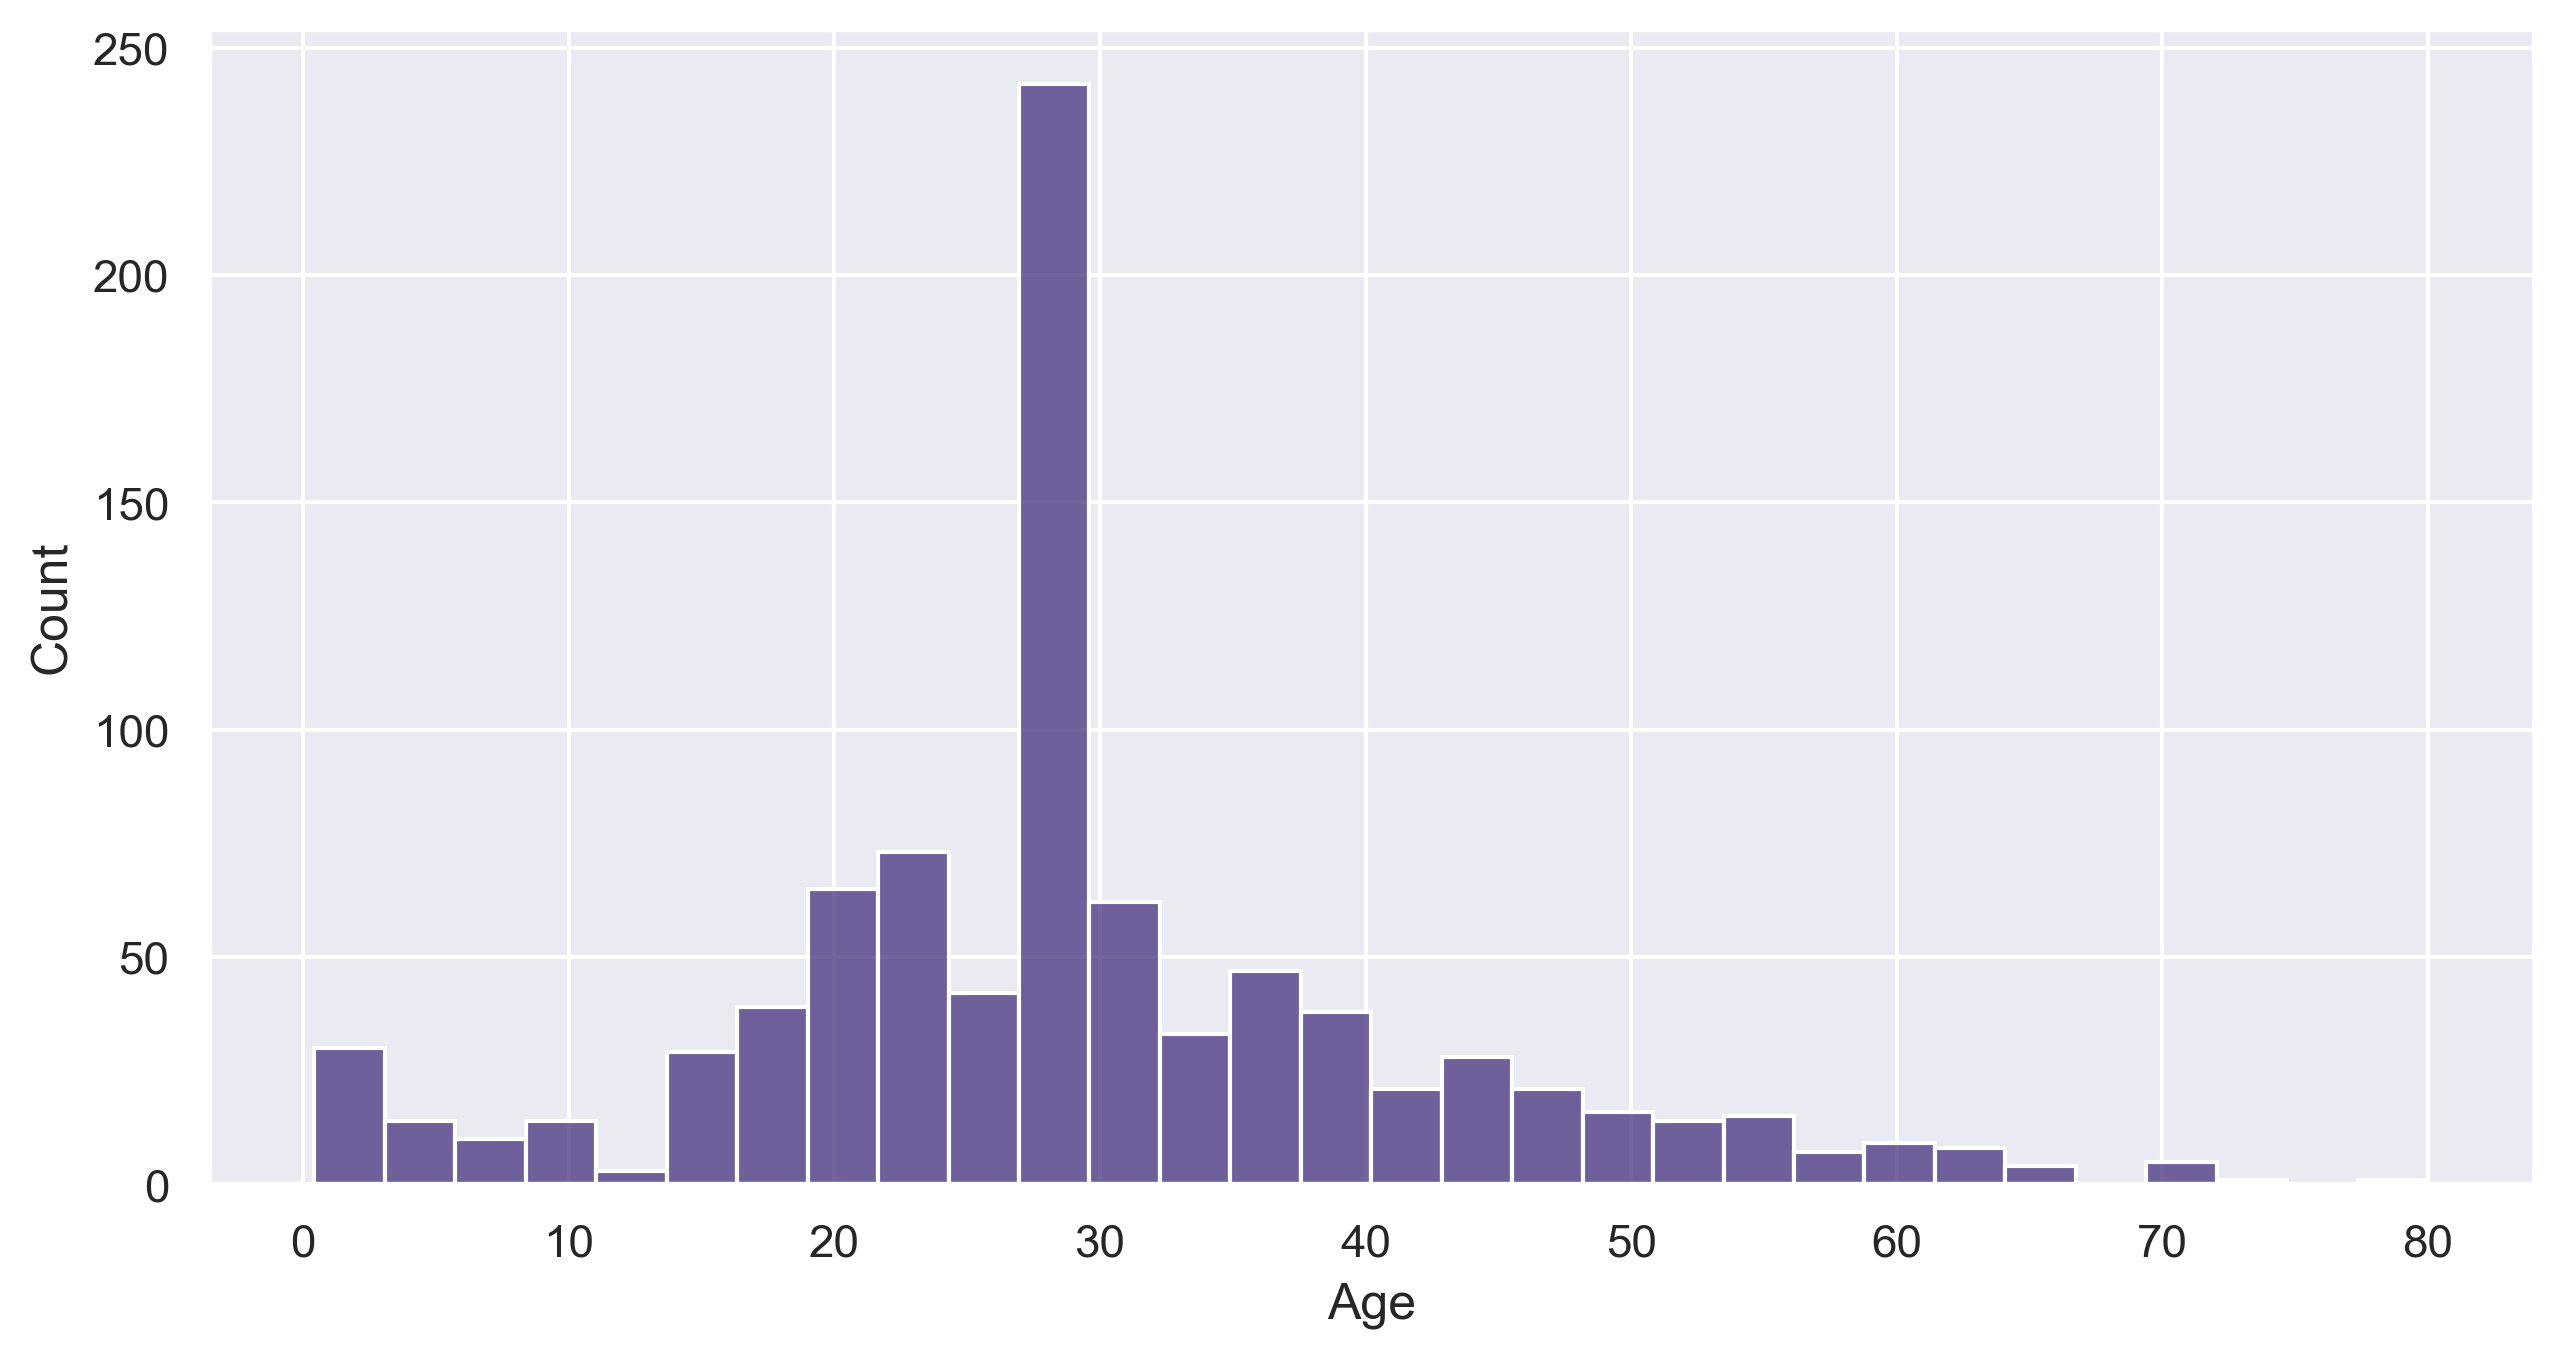

In [96]:
sns.histplot(x=train_data['Age'])

<Axes: xlabel='Survived', ylabel='Count'>

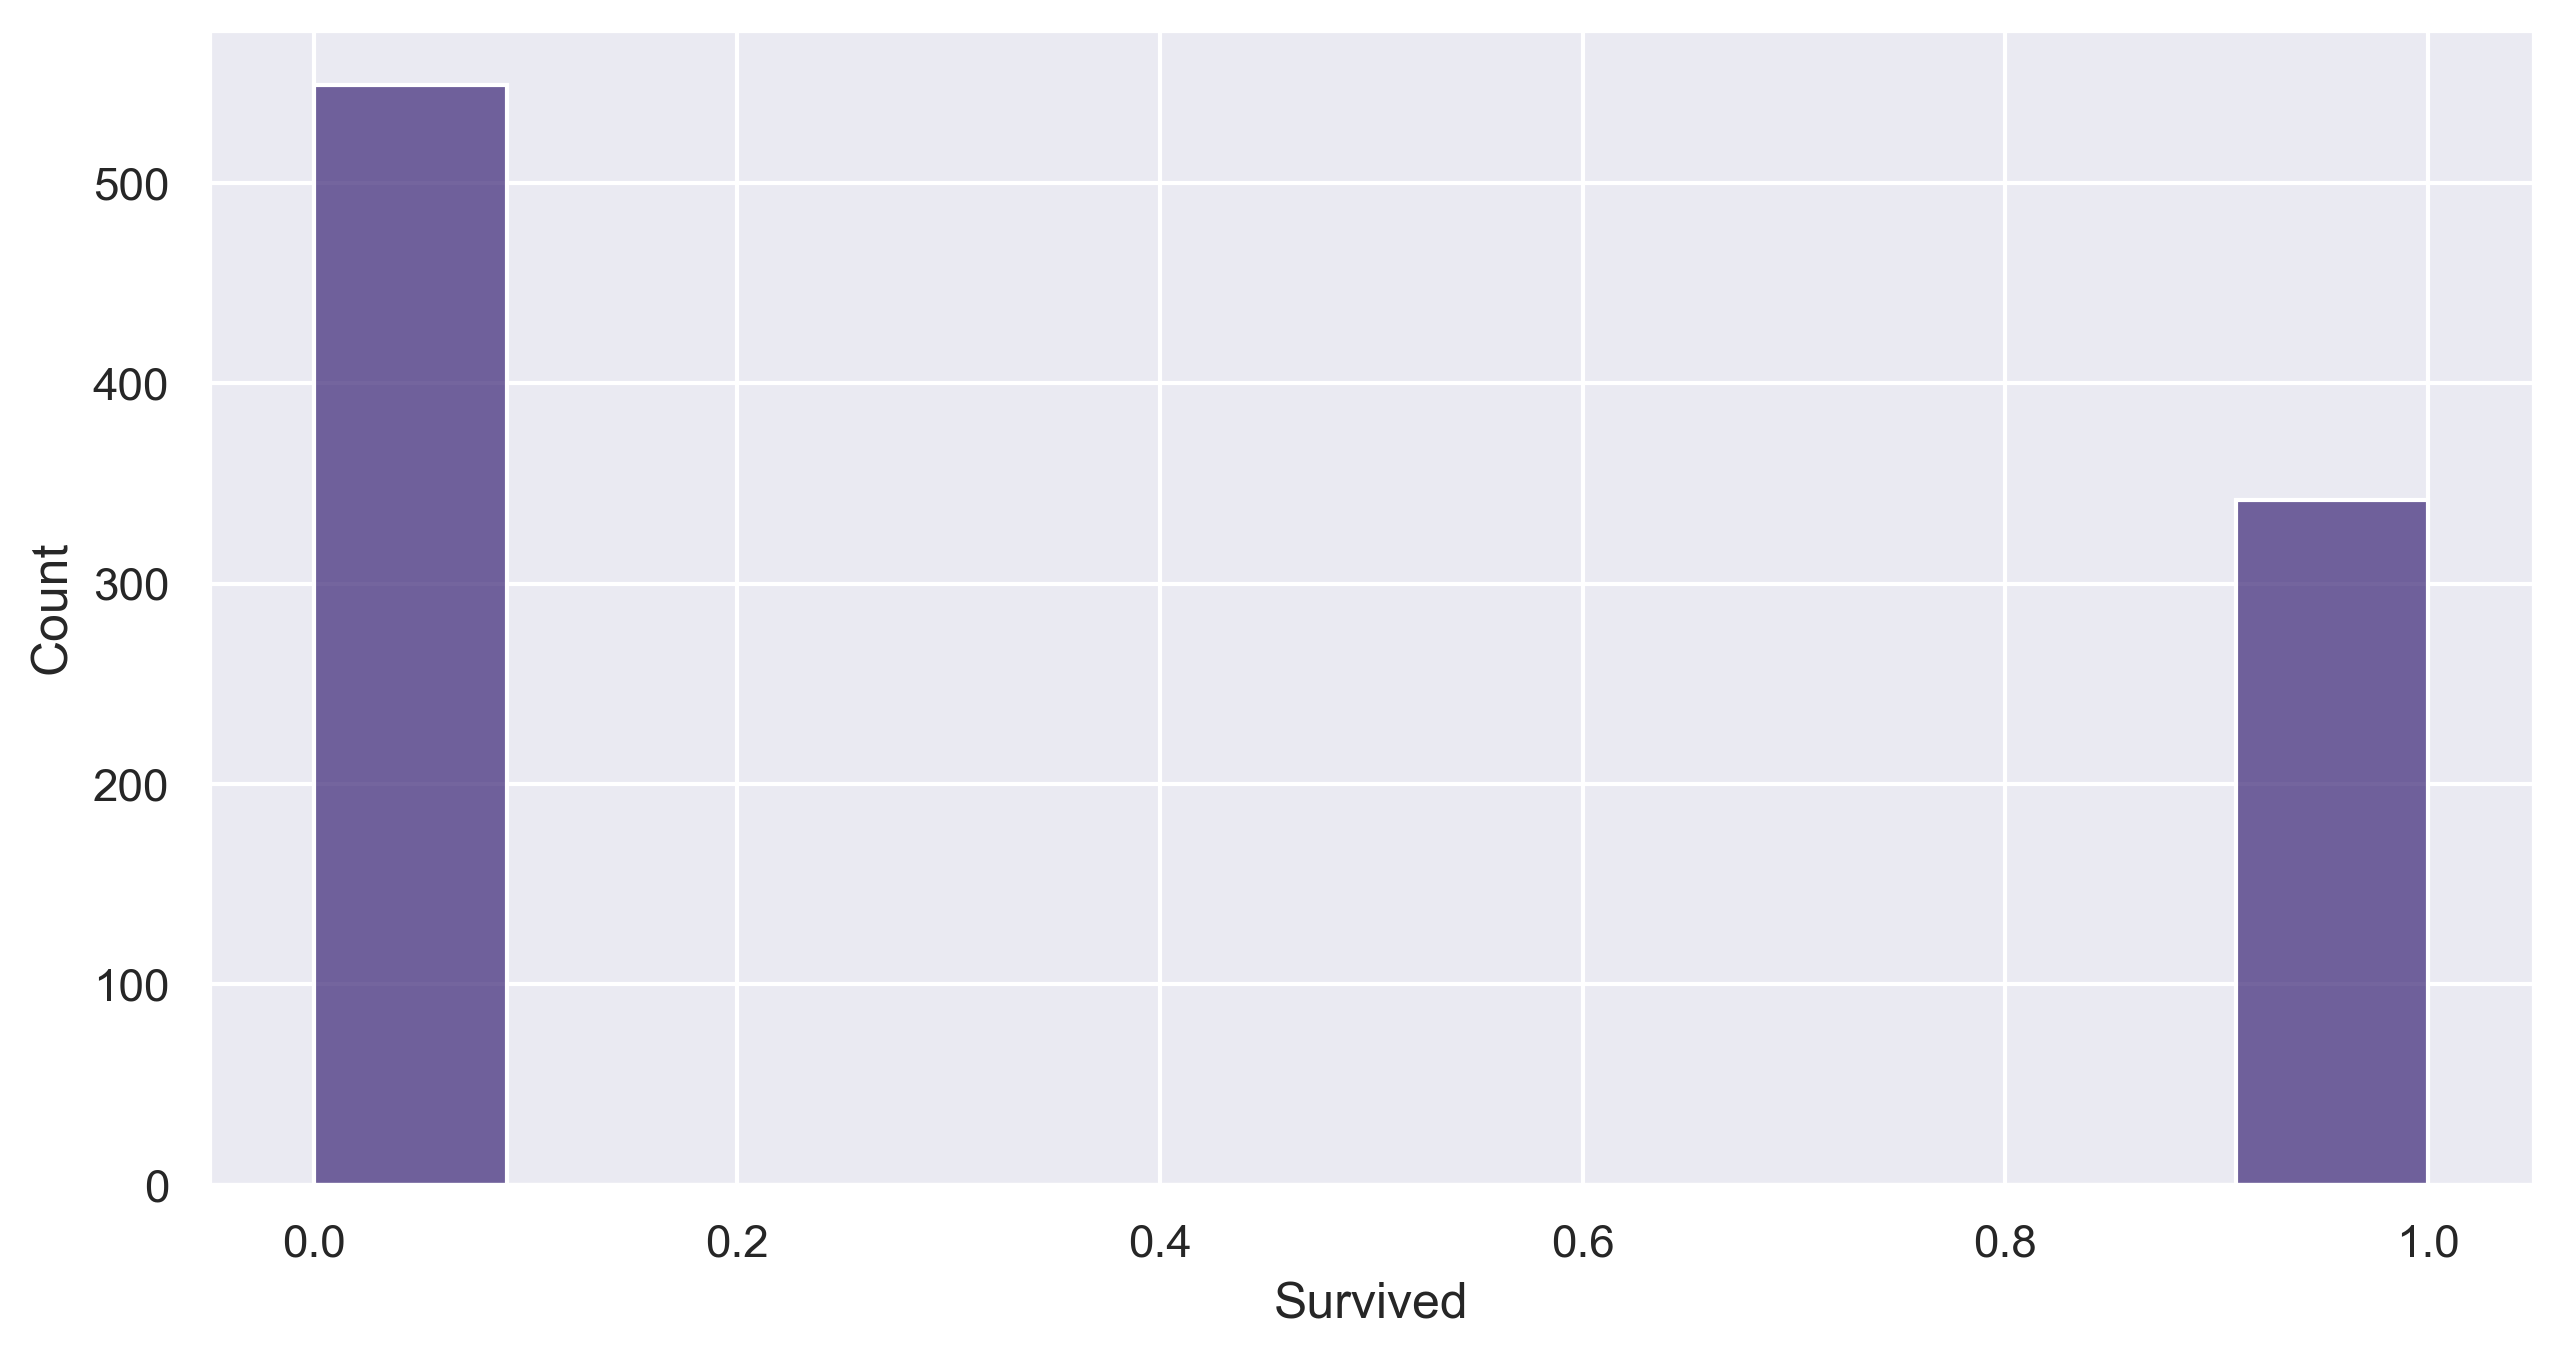

In [86]:
sns.histplot(x=train_data['Survived'])

In [ ]:
# Embarked column distribution

<Axes: xlabel='count', ylabel='Embarked'>

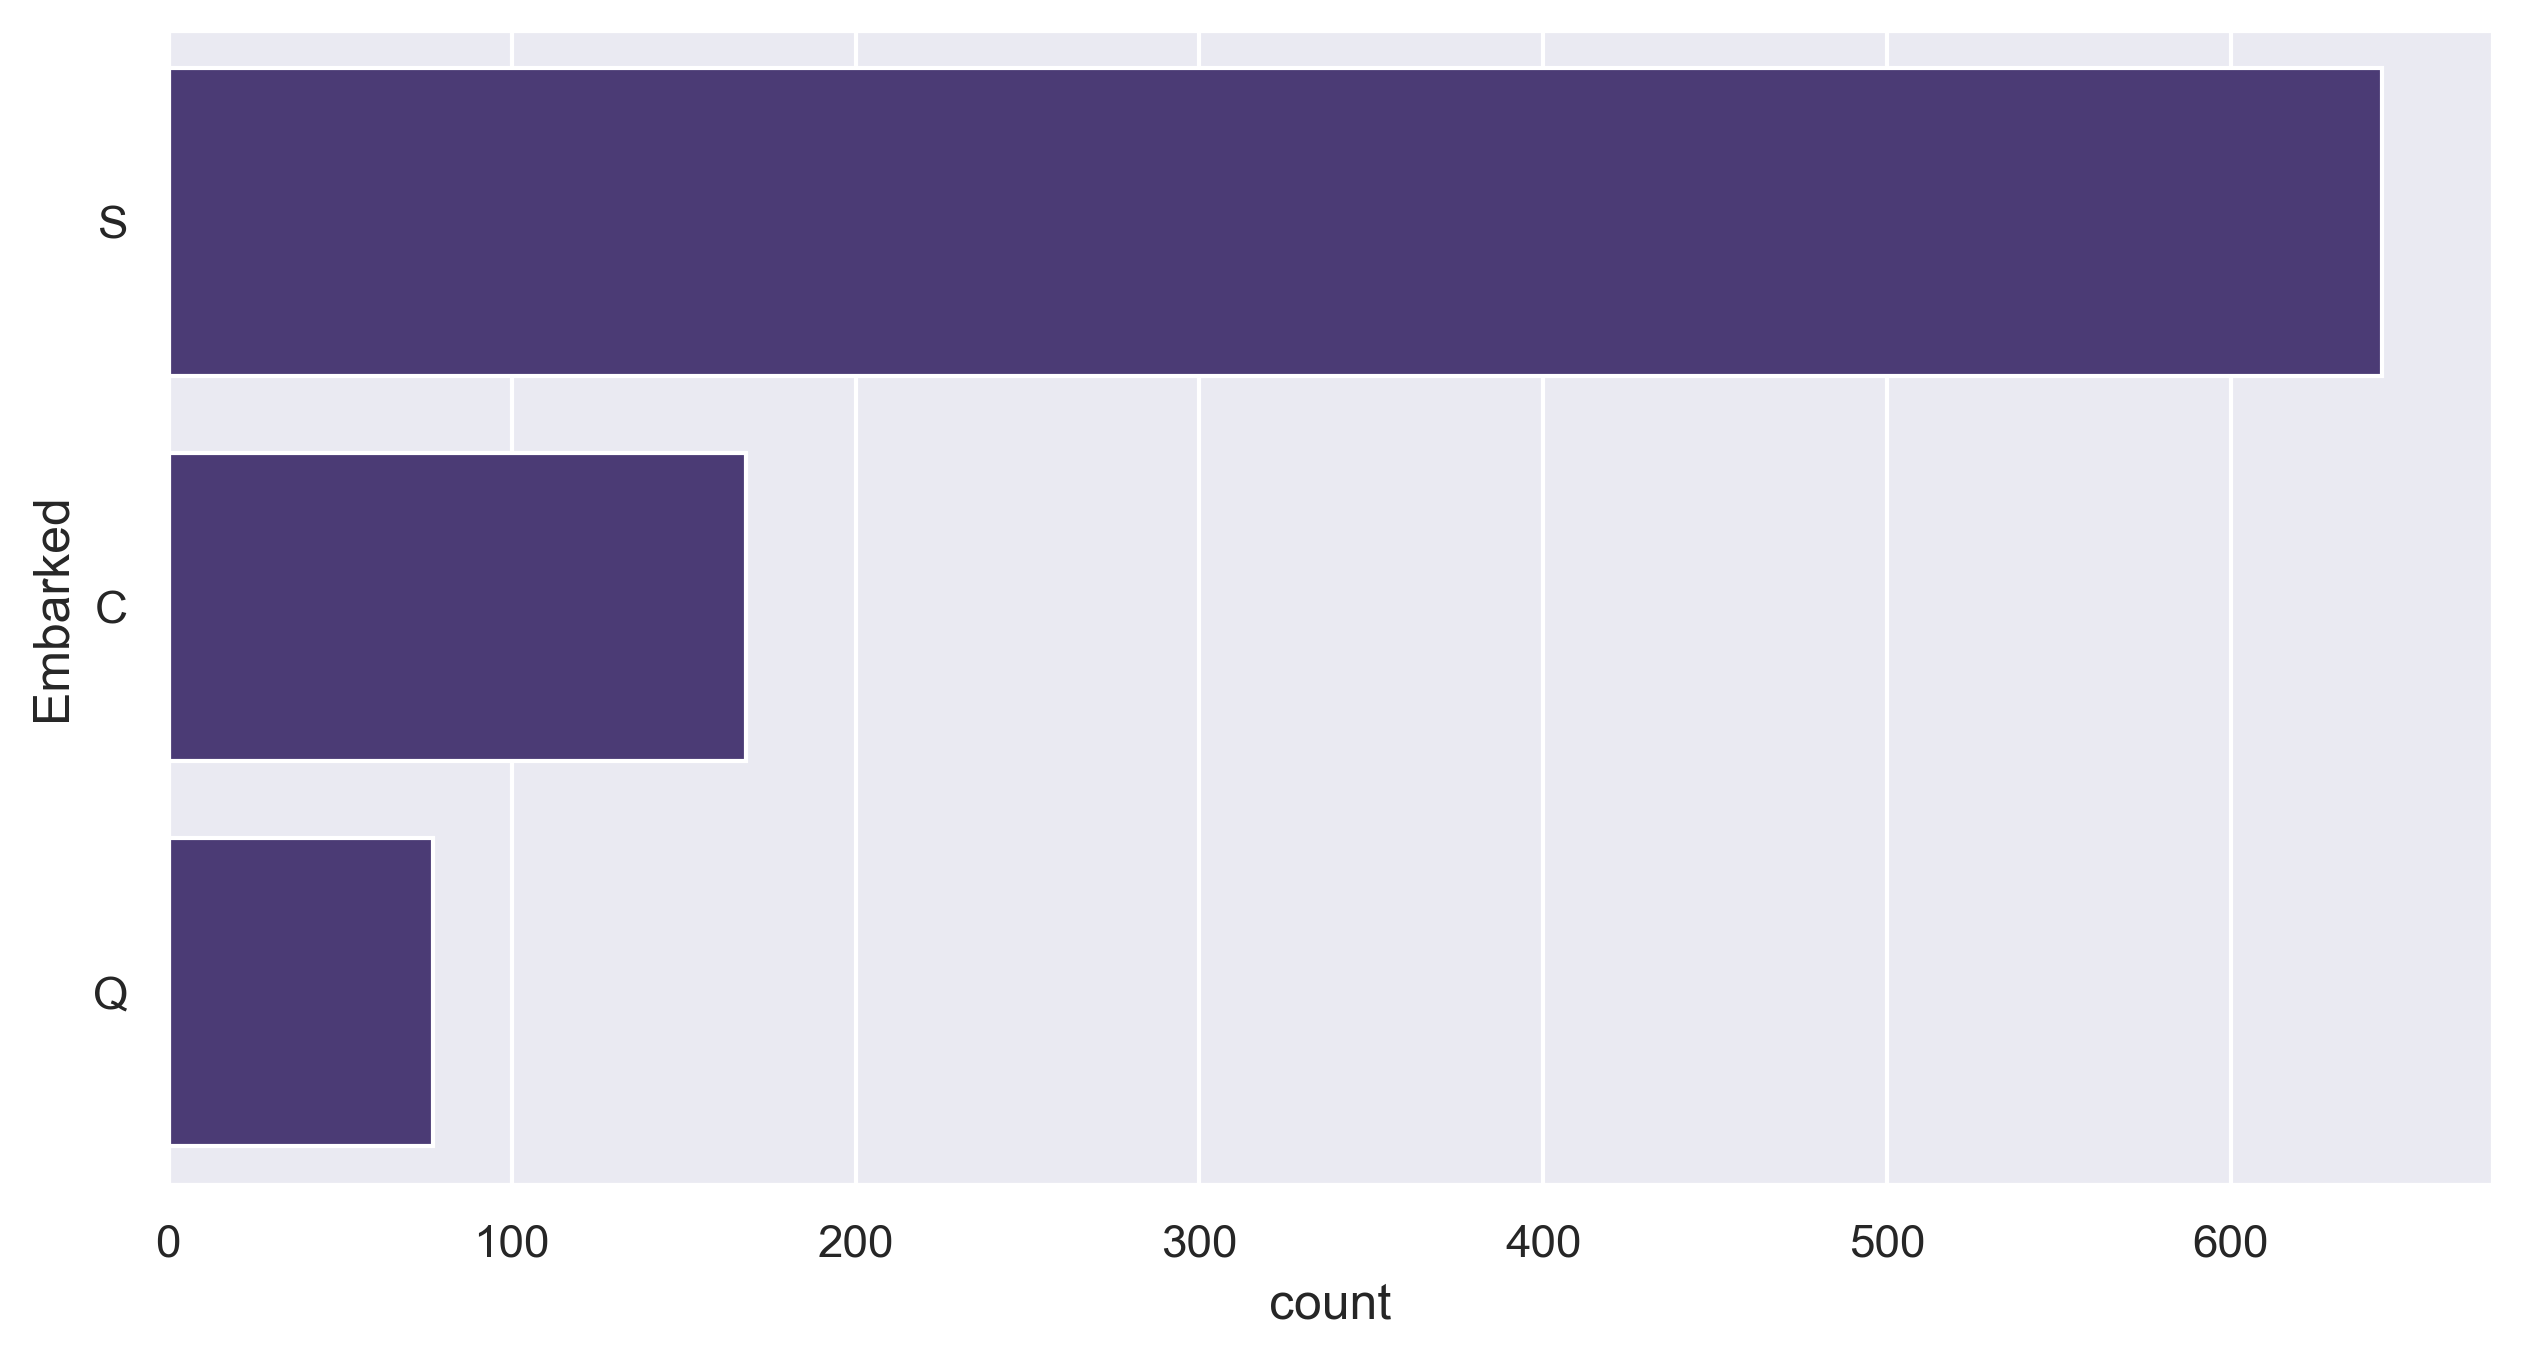

In [98]:
sns.countplot(train_data['Embarked'])

In [ ]:
#correlation between age and Fare

<Axes: xlabel='Age', ylabel='Fare'>

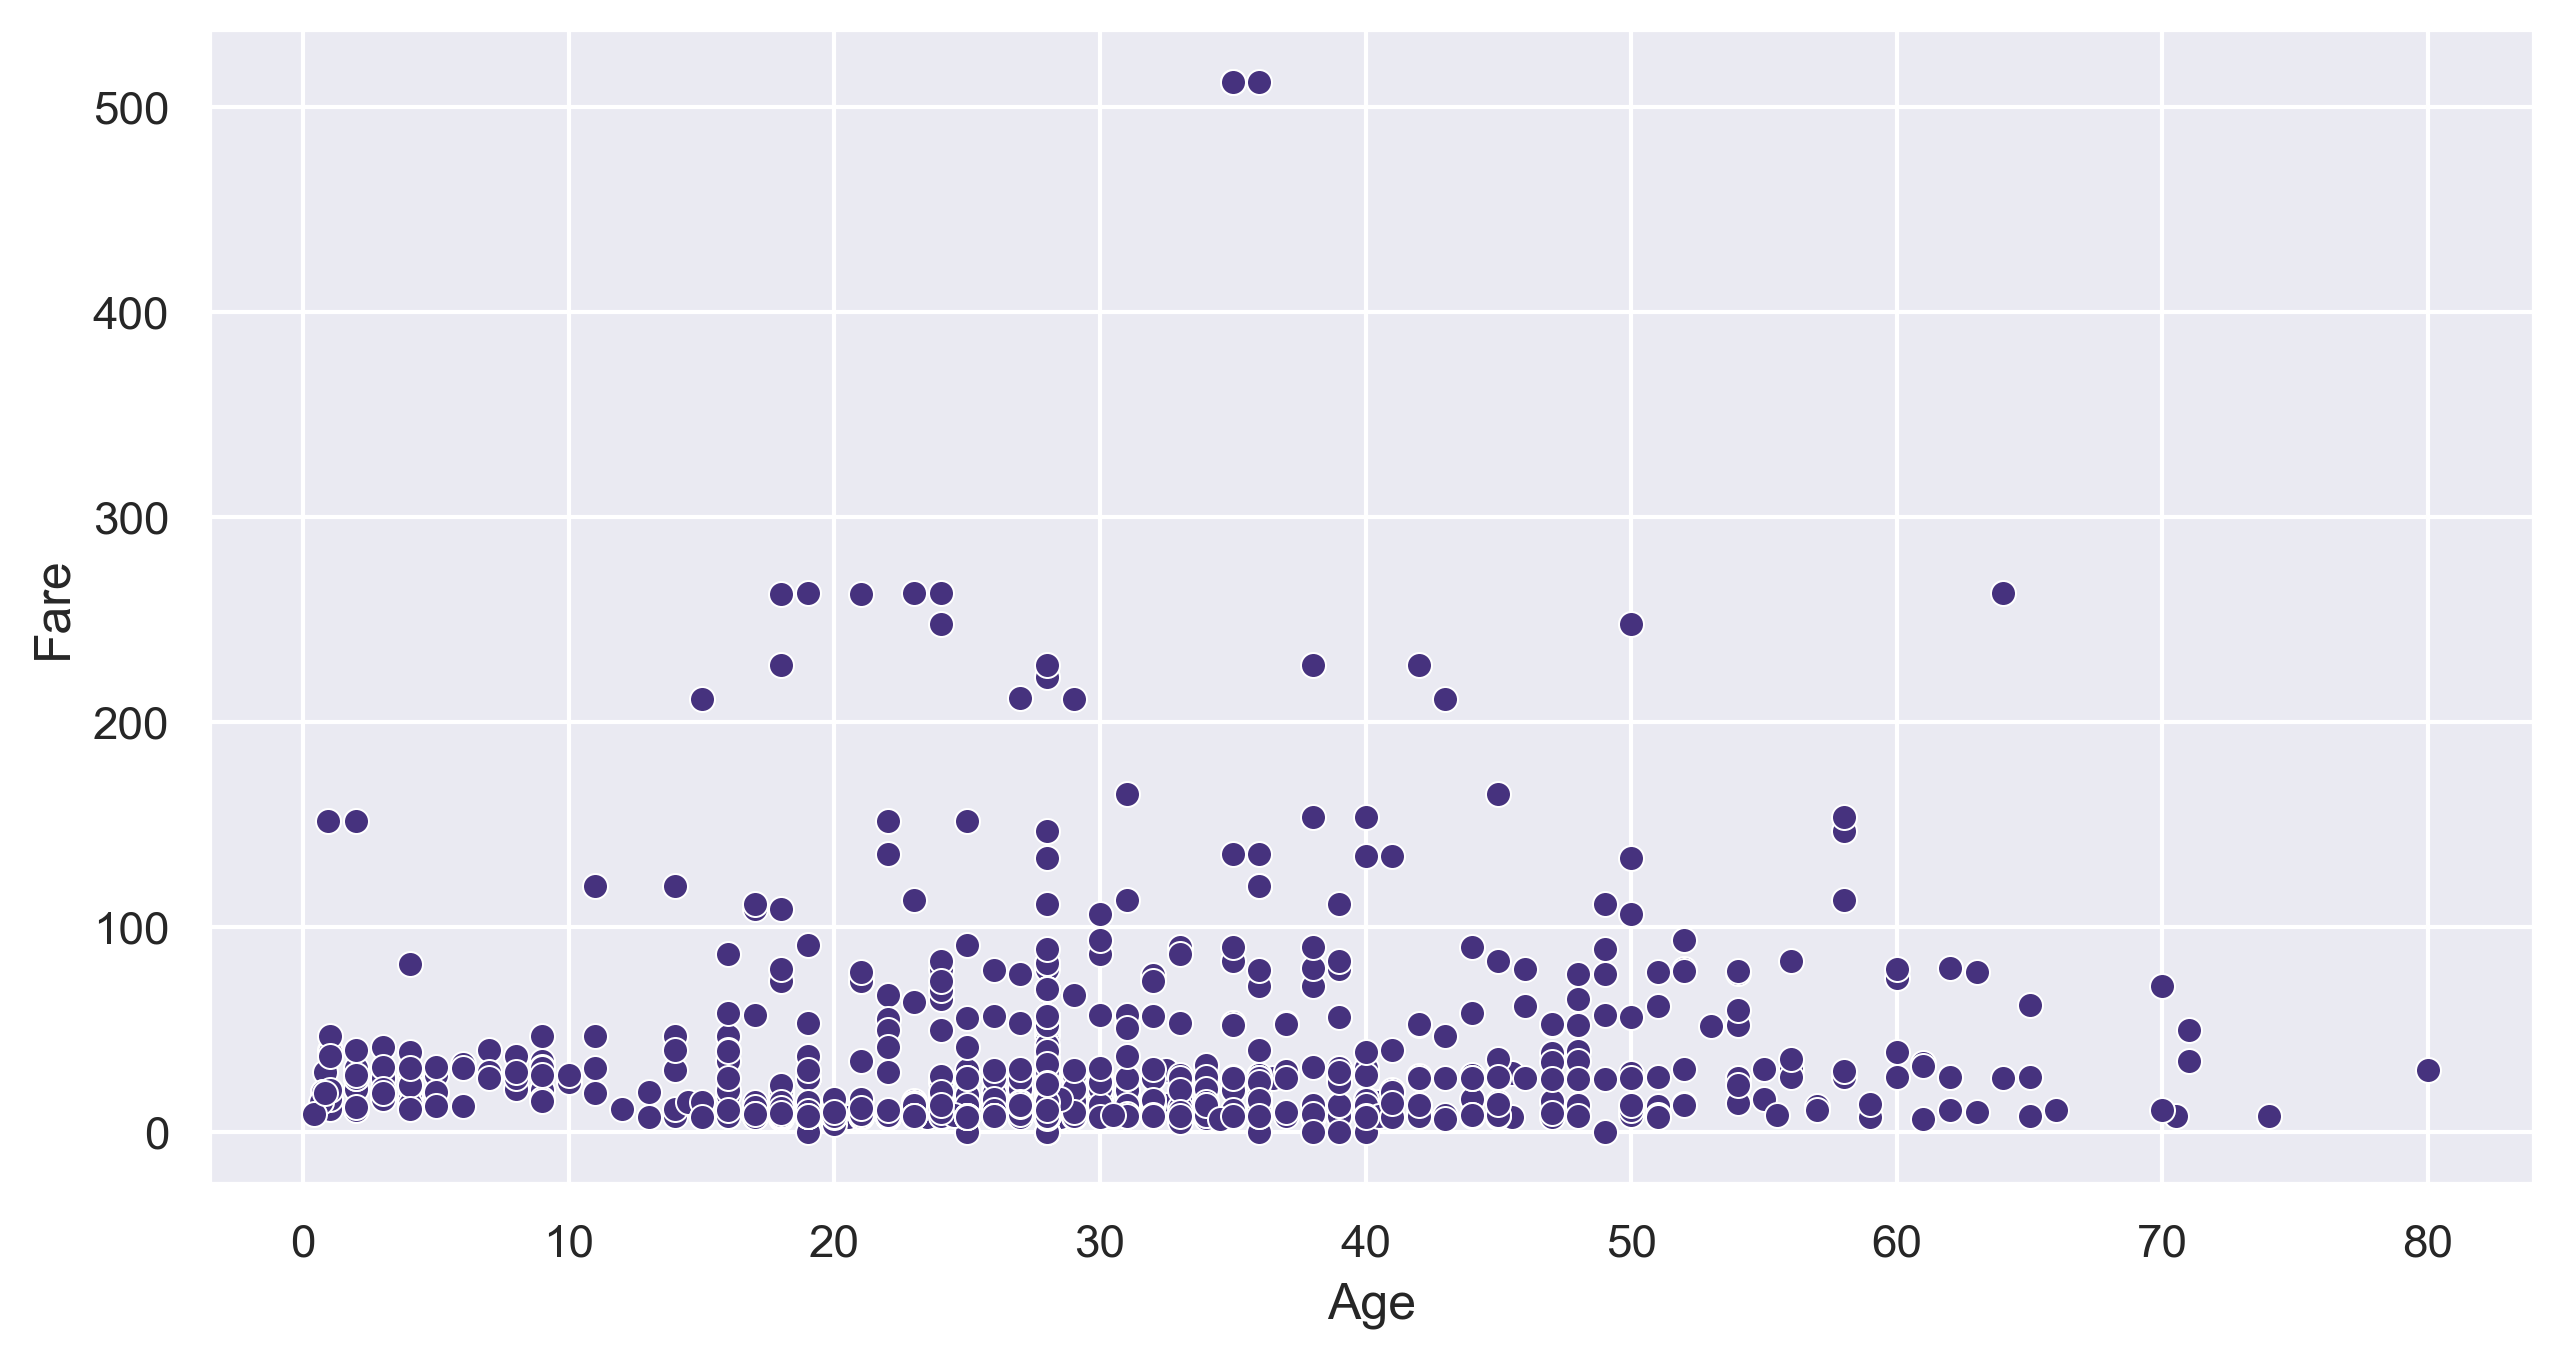

In [99]:
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'])

In [ ]:
#correlation between class and Fare

<Axes: xlabel='Pclass', ylabel='Fare'>

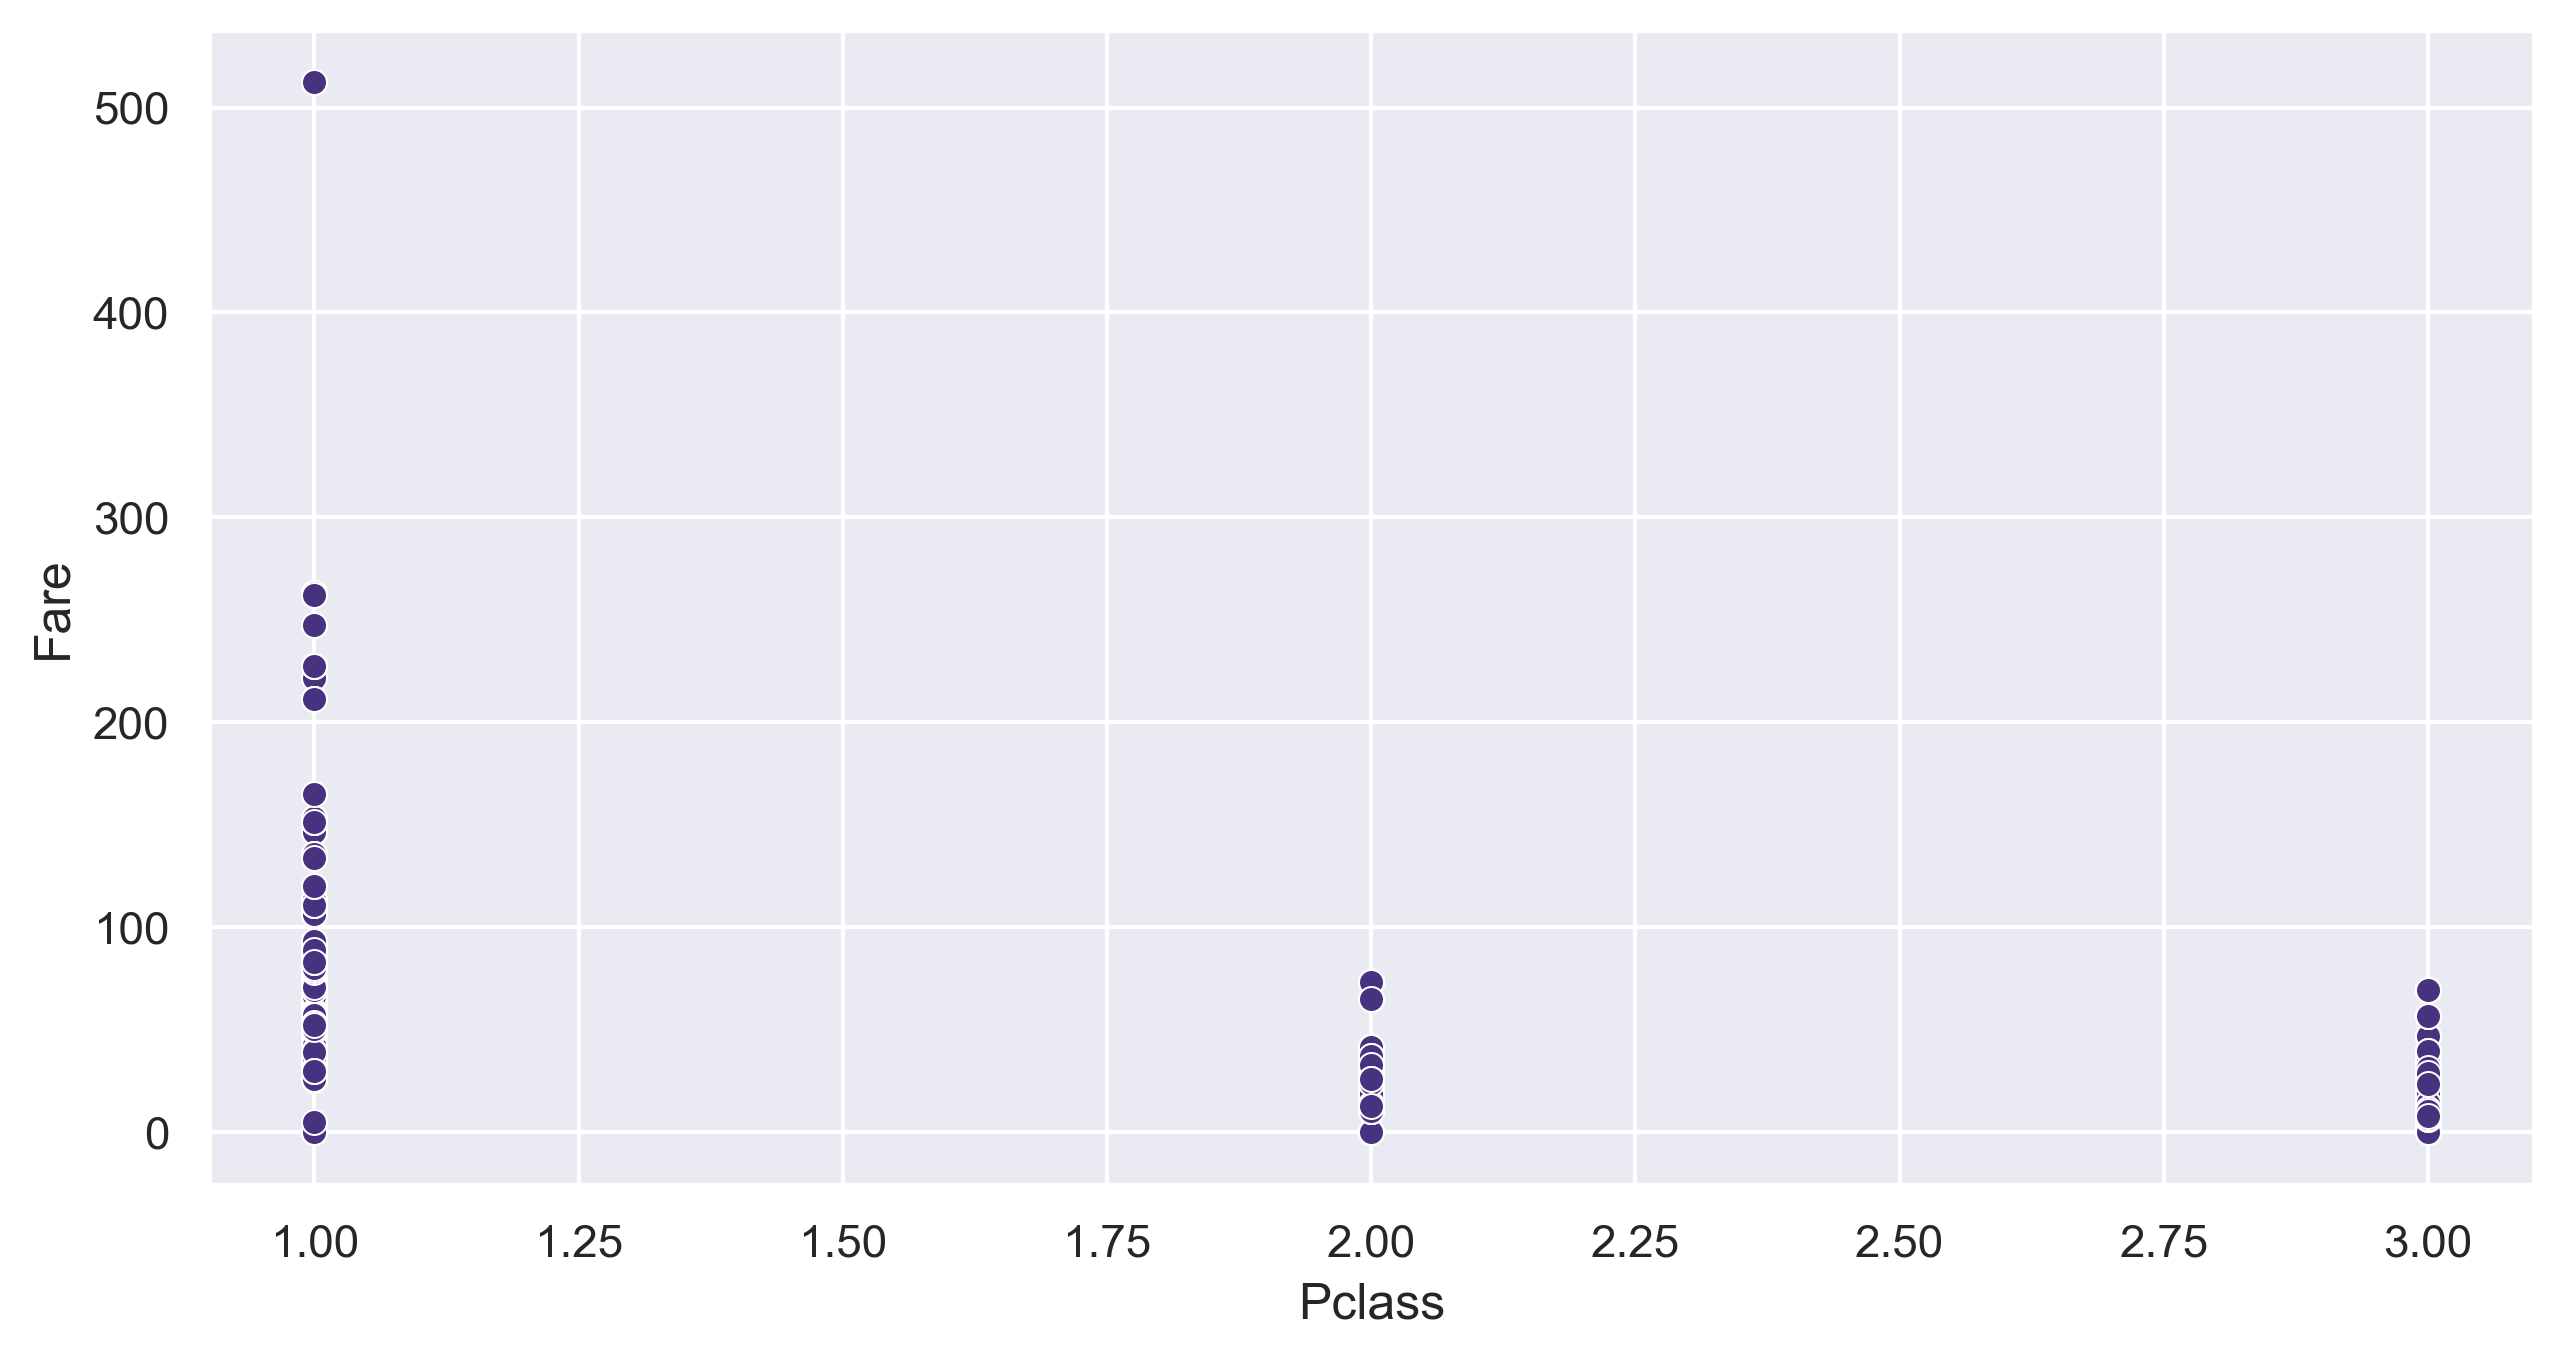

In [101]:
sns.scatterplot(x=train_data['Pclass'], y=train_data['Fare'])

## TRNASFORMATION

In [31]:
train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Feature selection

In [32]:
##### for analysis only these 4 independent features are important
# parch : "Number of Parents/Children Aboard"
# SibSp : "Number of Siblings/Spouses Aboard"
# Pclass : "Passenger Class"
# Sex : "Gender"

#### SPLITTING THE DATA INTO TRAININ AND TESTING PART

### TRAINING DATA

In [33]:
train_x = train_data[['Pclass','SibSp','Parch','Sex']]
train_x

,Pclass,SibSp,Parch,Sex
PassengerId,,,,
1,3,1,0,male
2,1,1,0,female
3,3,0,0,female
4,1,1,0,female
5,3,0,0,male
...,...,...,...,...
887,2,0,0,male
888,1,0,0,female
889,3,1,2,female


In [34]:
train_y = train_data['Survived']
train_y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

### One hot encoding

In [35]:
train_x = pd.get_dummies(data=train_x, columns=['Sex'],dtype=int)
train_x

,Pclass,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,
1,3,1,0,0,1
2,1,1,0,1,0
3,3,0,0,1,0
4,1,1,0,1,0
5,3,0,0,0,1
...,...,...,...,...,...
887,2,0,0,0,1
888,1,0,0,1,0
889,3,1,2,1,0


### TESTING DATA

In [38]:
x = test_data[['Pclass','SibSp','Parch','Sex']]
x

,Pclass,SibSp,Parch,Sex
PassengerId,,,,
892,3,0,0,male
893,3,1,0,female
894,2,0,0,male
895,3,0,0,male
896,3,1,1,female
...,...,...,...,...
1305,3,0,0,male
1306,1,0,0,female
1307,3,0,0,male


#### ONE HOT ENCODING

In [ ]:
# ecoding sex column

In [39]:
test_x = pd.get_dummies(data=x, columns=['Sex'], dtype=int)
test_x

,Pclass,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,
892,3,0,0,0,1
893,3,1,0,1,0
894,2,0,0,0,1
895,3,0,0,0,1
896,3,1,1,1,0
...,...,...,...,...,...
1305,3,0,0,0,1
1306,1,0,0,1,0
1307,3,0,0,0,1


# MODEL BUILDING

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg = LogisticRegression()

In [42]:
lg.fit(train_x, train_y)

LogisticRegression()

In [43]:
test_x.shape

(418, 5)

In [44]:
test_x

,Pclass,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,
892,3,0,0,0,1
893,3,1,0,1,0
894,2,0,0,0,1
895,3,0,0,0,1
896,3,1,1,1,0
...,...,...,...,...,...
1305,3,0,0,0,1
1306,1,0,0,1,0
1307,3,0,0,0,1


In [47]:
ypred = lg.predict(test_x)

In [48]:
ypred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
len(ypred)

418

In [ ]:
# it give me prediction for all the 418 rows

In [ ]:
x['Predicted_Survived'] = ypred

In [56]:
x

,Pclass,SibSp,Parch,Sex,Predicted_Survived
PassengerId,,,,,
892,3,0,0,male,0
893,3,1,0,female,1
894,2,0,0,male,0
895,3,0,0,male,0
896,3,1,1,female,1
...,...,...,...,...,...
1305,3,0,0,male,0
1306,1,0,0,female,1
1307,3,0,0,male,0


### I don't have actual values (taget column)  in the test_data dataset for the testing data so I cannot evaluate the model